# Performance Study of Charcoal-based RRS for Ultra-clean Rare-event Detectors

Maris Arthurs, Dongqing Huang, Chamindu S. Amarasinghe, and Wolfgang Lorenzon -- University of Michigan

Eric Miller -- SLAC National Accelerator Laboratory

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# liabrary import
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#!pip install matplotlib==3.2.1

import matplotlib
print (matplotlib.__version__)


3.2.1


In [3]:
# local function for figure display
# case_id = 1 for standard display
# case_id = 2 for pdf
# case_id = 3 for adjustable figure display
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 20):
   # case_id can only be 1,2,3
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)
    

### Radon Reduction with an RRS on the main circulation loop of LZ

Turnaround time of LZ in days: $T_{LZ} = \frac{M_{LZ}}{F \rho_{Xe}}$

In [4]:
#Constants
RoXeAtSTP     = 5.86     # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
F             = 500      # SLPM nominal LZ mass flow rate

T_LZ          = totalXeMassLZ/(F*RoXeAtSTP*60*24) #Lz turnaround time in days


print("Turnover time of LZ is %.1f days" %T_LZ)



Turnover time of LZ is 2.4 days


radon reduction fraction in LZ with a perfect trap: $\frac{N_{ss}}{N_{max}} =\frac{T_{LZ}}{\epsilon_{RRS}\tau +T_{LZ}}$

In [5]:
TauRN = 5.5 # radon lifetime in days

Rn_red_fraction_LZ = T_LZ/(TauRN + T_LZ) # fraction of radon reduction

# efficacy is 1 - radon reduction fraction
print("Radon reduction efficacy in LZ with a perfect trap is %.2f" %(1-Rn_red_fraction_LZ)) 

Radon reduction efficacy in LZ with a perfect trap is 0.70


Efficacy of Rn reduction in LZ: $ \epsilon_{LZ}=1-\frac{N_{ss}}{N_{max}}  =\frac{\tau }{\tau +T_{LZ}/\eta_{RRS}}$

In [6]:
# Efficacy of radon reduction in LZ
E_RRS = 0.4 # efficiency of the radon reduction system

# T_LZ (LZ volume exchange time == turnaround time) taken from cell 5

Ef_LZ = TauRN/(TauRN + T_LZ/E_RRS)
print("Radon reduction efficacy in LZ with negligible activity trap is %.1f when RRS remanent fraction is %.1f" %(Ef_LZ, E_RRS))

Radon reduction efficacy in LZ with negligible activity trap is 0.5 when RRS remanent fraction is 0.4


In [7]:
FlowSpace = np.linspace(1,3000,1000) # range of flow rates from 1 to 3000 SLPM
Tvspace   = np.linspace(0.1,7,1000) #range of volume exchange times in hours

RoXeAtSTP = 5.86     # desity of xenon at STP in g/l
TauRN     = 5.5    # radon lifetime in days

TvSpaceLZ = totalXeMassLZ/(FlowSpace*RoXeAtSTP*60*24) # LZ xenon turnaround time as a fuction of the flow rate (min)
red_efficiency = TauRN/(TauRN + TvSpaceLZ) # radon reduciton efficacy (1-RR) as a function of the circulation flow rate with a  perfect RRS
red_efficiency_Tv = TauRN/(TauRN + Tvspace)

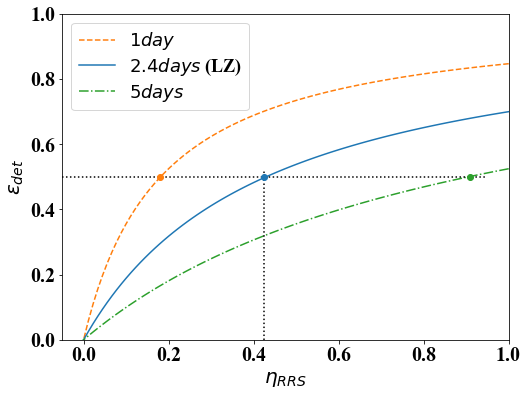

In [8]:
RoXeAtSTP     = 5.86     # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500      # SLPM nominal LZ volumetric flow rate

TauRN     = 5.516 # radon lifetime in days

#turnaround time in LZ in days
Tlz_1 = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP*60*24) #2.4days LZ volume exchange time (days)
Tv_2 = 1 # volume exchange time (days)
Tv_3 = 5 # volume exchange time (days)

fracRNescRRSspace = np.linspace(0, 1.1, 100)
effLZspace_1  = TauRN/(TauRN + Tlz_1/(1-fracRNescRRSspace))
effLZspace_2  = TauRN/(TauRN + Tv_2/(1-fracRNescRRSspace))
effLZspace_3  = TauRN/(TauRN + Tv_3/(1-fracRNescRRSspace))
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(1-fracRNescRRSspace,effLZspace_2, '--', label="$1 day$", color='tab:orange')
plt.plot(1-fracRNescRRSspace,effLZspace_1      , label="$2.4 days$ (LZ)", color='tab:blue')
plt.plot(1-fracRNescRRSspace,effLZspace_3, '-.', label="$5 days$", color='tab:green')
plt.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.axhline(y=0.5, color='k', xmax=0.95, linestyle=':')
plt.axvline(x=0.424, color='k', ymax=0.52, linestyle=':')
plt.plot(0.424, 0.5, color='tab:blue', marker='o')
plt.plot(0.91, 0.5, color='tab:green', marker='o')
plt.plot(0.18, 0.5, color='tab:orange', marker='o')

plt.ylim(0,1)
plt.xlim(-0.05,1)

plt.ylabel('$\epsilon_{det}$')
plt.xlabel('$\eta_{RRS}$')
plt.show()

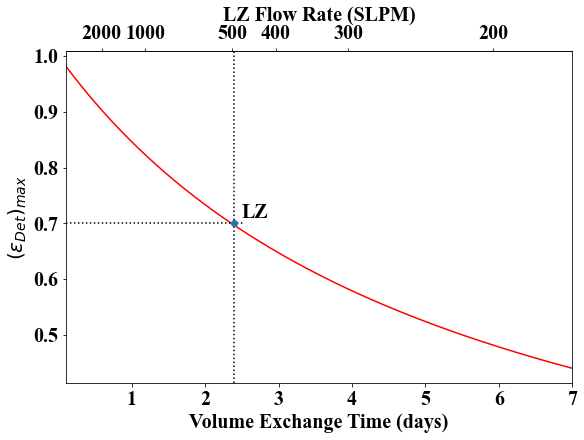

In [9]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.plot(Tvspace,red_efficiency_Tv, 'r')


#ax.set_xlim(0, 3)
#ax.set_ylim(0.6, 1)
ax.set_ylabel('$(\epsilon_{Det})_{max}$')
ax.set_xlabel('Volume Exchange Time (days)')

plt.axhline(y=0.7, xmin=0, xmax=0.35, color='k', linestyle=':')
plt.axvline(x=2.4, ymin=0, ymax=1, color='k', linestyle=':')
#plt.plot(2.4, 0.7, 'ko')
plt.plot(2.4, 0.7, color='tab:blue', marker='o')
#plt.plot(5, 0.525, color='tab:green', marker='o')
#plt.plot(1, 0.848, color='tab:orange', marker='o')
plt.text(2.5, 0.71, 'LZ', dict(size=15), color='k', size=20)



def flow2Tv(Tvspace):
    return (totalXeMassLZ/(Tvspace*RoXeAtSTP*60*24))

def Tv2flow(Tvspace):
    return (totalXeMassLZ/(Tvspace*RoXeAtSTP*60*24))

secax = ax.secondary_xaxis('top', functions=(flow2Tv, Tv2flow))
secax.set_xlabel('LZ Flow Rate (SLPM)')
secax.set_xticks(np.array([2000,1000,500,400,300,200]))
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

### Exploring performance of an ideal (no intrinsic activity) single-trap

reduction fraction a perfect trap with no activity: $r =\frac{ A_{out}}{A_{in}} = e^{-\frac{m}{\mu}}$ <br>
characteristic mass of a trap: $\mu=f\tau /k_a$

In [10]:
flowSpace = np.linspace(0,2000,300, endpoint=False) # range of flow rates SLPM
red_frac  = 0.1 # (1-rem fraction) for rem fraciton of 0.9

Ka_ct     = 3000        # l/kg at 190K
Ka_wt     = 500         # l/kg at 295K
TauRN     = 5.5*24*60 # min radon lifetime
S_o       = 0.5         # mBq/kg

mass_cold = flowSpace*(-np.log(red_frac))*TauRN/Ka_ct # mass of charcoal needed to achieve Teff efficacy in cold
mass_warm = flowSpace*(-np.log(red_frac))*TauRN/Ka_wt # mass of charcoal needed to achieve Teff efficacy in warm


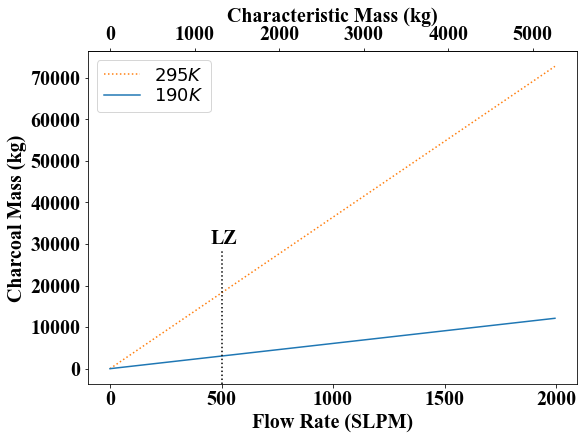

In [11]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
ax.plot(flowSpace, mass_warm,':', color='tab:orange', label="$295 K$")
ax.plot(flowSpace, mass_cold, color='tab:blue', label="$190 K$")
ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('Charcoal Mass (kg)')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

plt.axvline(x=500, ymin=0, ymax=0.4, color='k', linestyle=':')
plt.text(450, 30000, 'LZ', dict(size=15), color='k', size=20)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

### Exploring performance of an realisitic single-trap with constant inlet radon activity

Efficacy of a single trap: $\epsilon=1-A_{red}/A_{in} = 1- e^{-\frac{m}{\mu}} - \frac{s_o \mu}{A_{in}} \left(1-e^{-\frac{m}{\mu}}\right)$ <br>
define a new parameter as $f_{critical} = \frac{A_{in}k_a}{s_o \tau}$
Efficacy of a single trap: $\epsilon=1-A_{red}/A_{in} = 1- e^{-\frac{m}{\mu}} - \frac{f}{f_{critical}} \left(1-e^{-\frac{m}{\mu}}\right)$ <br>
characteristic mass of a trap: $\mu=f\tau /k_a$

In [12]:
#this funtion calculates the efficacy of a single-column adsorptive trap
# CFR is the flow rate in units of critical flow (i.e. f/fcritical)
# is the charcoal mass in units of characteristic mass (i.e. m/miu)
def E_CT_new(CFR, CMR):
    return 1- np.exp(-CMR) - CFR*(1 - np.exp(-CMR))

In [13]:
# defining a range of flows in units of critical flow
CFR = np.linspace(0,4,1000)

ectSpace02_new = E_CT_new(CFR, 0.2) # mass 0.2miu
ectSpace1_new  = E_CT_new(CFR, 1)   # mass miu
ectSpace2_new  = E_CT_new(CFR, 2)   # mass 2miu
ectSpace10_new = E_CT_new(CFR, 10)  # mass 10miu

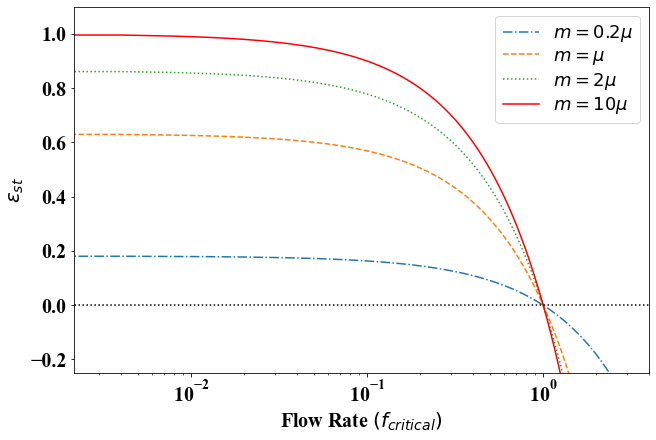

In [14]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)

ax.semilogx(CFR, ectSpace02_new, '-.', label="$m  = 0.2\mu$")
ax.semilogx(CFR, ectSpace1_new, '--', label="$m  = \mu$")
ax.semilogx(CFR, ectSpace2_new, ':',  label="$m = 2\mu$")
ax.semilogx(CFR, ectSpace10_new, 'r', label="$m  = 10\mu$")

ax.plot(0*np.ones(len(CFR)), ':', c='k')
ax.set_xlim(0, 4)
#ax.plot(CFR,0*np.ones(len(CFR)), ':', c='k')
#plt.axvline(x=0.033, ymin=-0.95, ymax=0.95, color='k', linestyle=':')
#plt.text(0.039, 0.85, 'LZ', dict(size=15), color='k',)
#plt.text(0.039, 0.75, '$m/ \mu = 7.6$', dict(size=15), color='k',)
#plt.text(0.039, 0.65, '$f/f_{critical} = 0.033$', dict(size=15), color='k',)


#ax.set_xlim(0.1, 1000)
ax.set_ylim(-0.25, 1.1)
ax.set_xlabel("Flow Rate $(f_{critical})$")
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.show()

In [15]:
# defining a range of masses in units of characteristic mass
CMR = np.linspace(0,10,1000)

ectSpace001_new = E_CT_new(0.01, CMR) # flow rate 0.01fcritical
ectSpace01_new = E_CT_new(0.1, CMR)   # flow rate 0.1fcritical
ectSpace05_new = E_CT_new(0.5, CMR)   # flow rate 0.5fcritical
ectSpace1_new = E_CT_new(1, CMR)      # flow rate fcritical
ectSpace5_new = E_CT_new(2, CMR)      # flow rate 2fcritical

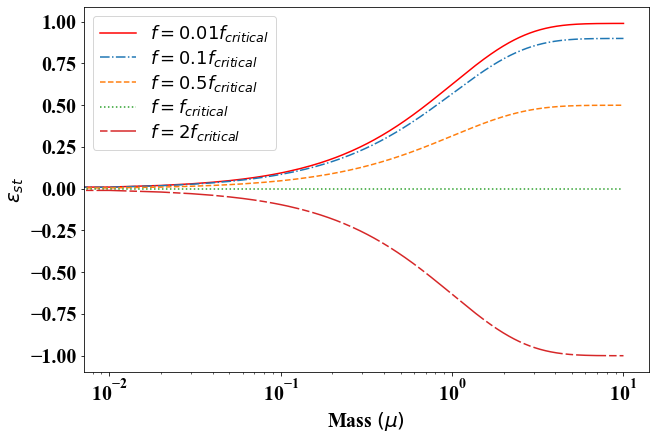

In [16]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(9,6), constrained_layout=True)

ax.semilogx(CMR, ectSpace001_new, 'r', label="$f = 0.01f_{critical}$")
ax.semilogx(CMR, ectSpace01_new, '-.', label="$f = 0.1f_{critical}$")
ax.semilogx(CMR, ectSpace05_new, '--',  label="$f = 0.5f_{critical}$")
ax.semilogx(CMR, ectSpace1_new, ':',  label="$f = f_{critical}$")
ax.semilogx(CMR, ectSpace5_new, linestyle='--', dashes=(5,2,20,2),  label="$f = 2f_{critical}$")

ax.set_xlabel("Mass $(\mu)$")
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

plt.show()

In [18]:
# defining constants for an LZ specific example
flow_LZ_irrs   = 0.5    #SLPM
Ka_ct_LZ  = 3000        #l/kg
TauRN     = 5.5*24*60   # radon lifetime in min
mass_LZ   = 10          #kg
S_o       = 0.5         #mBq/kg
A_in      = 20          # mBq


#characteristic mass of a trap given by eq above cell 43
def miu(flow, ka, Tau):
    return (flow*Tau/ka)

LZiRRS_miu = miu(flow_LZ_irrs, Ka_ct_LZ, TauRN)
print("The characteristic mass of the LZ iRRS (single-trap) %.1f kg" %LZiRRS_miu)

m_miu_LZ = mass_LZ/LZiRRS_miu
print("The LZ iRRS (single-trap) mass %.1f kg in units of the characteristic mass: %.1f" %(mass_LZ ,m_miu_LZ))

# critical flow rate of a tram given by eq above cell 43
def f_critical(ka, Tau, Srn, A_in):
    return A_in*ka/(Srn*Tau)

LZiRRS_fc =  f_critical(Ka_ct_LZ, TauRN, S_o, A_in)
print("The critical flow rate of the LZ iRRS (single-trap) %.3f SLPM" %LZiRRS_fc)

f_fc_LZ = flow_LZ_irrs/LZiRRS_fc
print("The LZ iRRS (single-trap) flow rate %.3f SLPM in units of critical flow %.3f " %(flow_LZ_irrs, f_fc_LZ))



The characteristic mass of the LZ iRRS (single-trap) 1.3 kg
The LZ iRRS (single-trap) mass 10.0 kg in units of the characteristic mass: 7.6
The critical flow rate of the LZ iRRS (single-trap) 15.152 SLPM
The LZ iRRS (single-trap) flow rate 0.500 SLPM in units of critical flow 0.033 


In [19]:
#this funtion calculates the efficacy of a single-column adsorptive trap given above cell 43
def E_CT(flow, mass, ka, Tau, Srn, N):
    return 1- np.exp(-ka*mass/(flow*Tau)) - Srn*flow*(Tau/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))/N

In [20]:
#LZ iRRS specific constants
Ka_ct     = 3000         # l/kg at 190K
Ka_wt     = 500          # l/kg at 295K
TauRN     = 5.5*24*60    # radon lifetime in min
S_o       = 0.5          # mBq/kg
Trap_mass = 10           # mass of the charcoal kg
A_in      = 20           # mBq total inlet radon activity

flowSpace = np.linspace(0.2,1000,10000)

#Efficacy of a single-trap at 190K as a fuction of flow rates for a range of charcoal masses (charcoal actibity 0.5mBq/kg)
ectSpaceM5   = E_CT(flowSpace,5,  Ka_ct,TauRN,0.5,A_in)
ectSpaceM10  = E_CT(flowSpace,10, Ka_ct,TauRN,0.5,A_in)
ectSpaceM25  = E_CT(flowSpace,25, Ka_ct,TauRN,0.5,A_in)
ectSpaceM50 = E_CT(flowSpace,50,Ka_ct,TauRN,0.5,A_in)

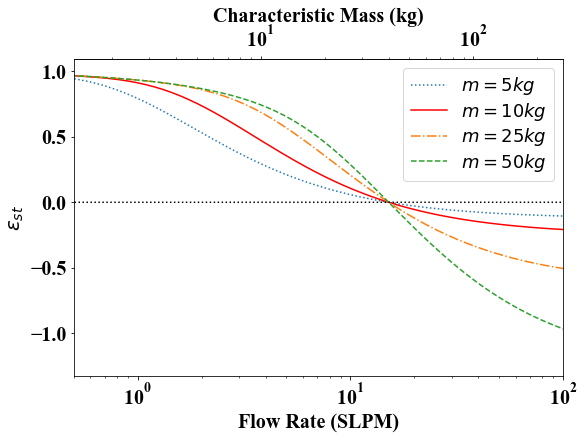

In [21]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)

ax.semilogx(flowSpace, ectSpaceM5,  ':',  label="$m = 5 kg$")
ax.semilogx(flowSpace, ectSpaceM10, 'r',  label="$m = 10 kg$")
ax.semilogx(flowSpace, ectSpaceM25, '-.', label="$m = 25 kg$")
ax.semilogx(flowSpace, ectSpaceM50,'--', label="$m = 50 kg$")

ax.plot(0*np.ones(len(flowSpace)), ':', c='k')

ax.set_xlim(0.5, 100)
#ax.set_ylim(60, 100)

ax.set_xlabel('Flow Rate (SLPM)')
ax.set_ylabel('$\epsilon_{st}$')
ax.legend(loc='auto', frameon=True, labelspacing=0.2, prop={'size': 18})

def flow2miu(flowSpace):
    return (flowSpace*TauRN/Ka_ct)

def miu2flow(flowSpace):
    return (flowSpace)

secax = ax.secondary_xaxis('top', functions=(flow2miu, miu2flow))
secax.set_xlabel('Characteristic Mass (kg)')
plt.show()

### Performance of a VSA system for TPC detectors ignoring charcoal activity

simulation that calculates the radon dynamics of a VSA in the absense of charcoal activity according to: $(N_{out})_{n} = (N_{in})_{n}(1-\eta_{vsa})f_{out}e^{-\frac{T_{feed}}{\tau }}$ <br>

and  $(N_{in})_{n+1} = N_{Det} + (1-\eta_{st})\left[(N_{in})_n(1-\eta_{vsa})f_{purge} +(N_{in})_{n}\eta_{vsa}\right]e^{-\frac{T_{feed}}{\tau }}$ <br>

Lets convert all absolute radon quantities into fractional variables.

Define radon fraction $\gamma$ as $\gamma = N/N_{Det}$ where $N_{Det}$ is the inlet number of radon atoms from the detector. With this new definition the set of equations given above will transform to: <br>

$(\gamma_{out})_{n} = (\gamma_{in})_{n}(1-\eta_{vsa})r_{out}e^{-\frac{T_{feed}}{\tau }}$ <br>

$(\gamma_{in})_{n+1} = 1 + (1-\eta_{st})\left[(\gamma_{in})_n(1-\eta_{vsa})r_{purge} + (\gamma_{in})_{n}\eta_{vsa}\right]e^{-\frac{T_{feed}}{\tau }}$ <br>  



In [15]:
def RRS_Gout(rOUT,EtaVSA,gammaIN,feedTIME,lifeRN):
    return rOUT*(1-EtaVSA)*gammaIN*np.exp(-feedTIME/lifeRN)
def RRS_Gin(rPURGE,EtaVSA, EtaST, gammaIN,feedTIME,lifeRN):
    return 1 + (1-EtaST)*( rPURGE*(1-EtaVSA)*gammaIN + (EtaVSA*gammaIN) )*np.exp(-feedTIME/lifeRN)

In [14]:
# Performace of the VSA as a function of the swing time this does not take into account specific activity of charcoal
# Parameters

############### Defining computational parameters ################
nLoops = 1000 # number of swings

Evsa_99 = 0.99 # VSA feed column remanent fraction
Evsa_95 = 0.95 # VSA feed column remanent fraction
Evsa_90 = 0.90 # VSA feed column remanent fraction

# this script is only with a VSA and without a single trap 
# so Ect single trap remanent fraction is taken zero
Ect = 0 # single trap remanent fraction

r_leave = 0.9 # fraction of xenon leaving the swing system
r_purge = 0.1 # fraction of xenon for purging the other column of the swing system (F_leave + F_purge = 1)

Trn     = 132*60  # Rn lifetime in min (note this is lifetime not half life)

TfSpace = np.linspace(30,600,1000) # range of feed times (min)
##################################################################


# pre-allocation sim needed variables
Gout_99 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_95 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed


# pre-allocating a variable to store the steady state Rn fraction for each feed time
Gout_st_99 = np.zeros(len(TfSpace))
Gout_st_95 = np.zeros(len(TfSpace))
Gout_st_90 = np.zeros(len(TfSpace))

# simulation starts:
# looping over the feed times
for idx, t in enumerate(TfSpace):
    
    Gi_99 = 1 #  initial rn fraction (1 b/c no reductin at first)
    Gi_95 = 1 #  initial rn fraction 
    Gi_90 = 1 #  initial rn fraction 
    
    #looping over the feeds
    for i in range(0,nLoops):
        # number of radon escaped the swing system
        Gout_99[i] = RRS_Gout(r_leave,Evsa_99,Gi_99,t,Trn)
        Gout_95[i] = RRS_Gout(r_leave,Evsa_95,Gi_95,t,Trn)
        Gout_90[i] = RRS_Gout(r_leave,Evsa_90,Gi_90,t,Trn)

        # Nin changes as we loop over the feed cycle time until we reach steady state
        Gi_99 = RRS_Gin(r_purge,Evsa_99, Ect, Gi_99,t,Trn)
        Gi_95 = RRS_Gin(r_purge,Evsa_95, Ect, Gi_95,t,Trn)
        Gi_90 = RRS_Gin(r_purge,Evsa_90, Ect, Gi_90,t,Trn)
        
    Gout_st_99[idx] = Gout_99[-1]
    Gout_st_95[idx] = Gout_95[-1]
    Gout_st_90[idx] = Gout_90[-1]





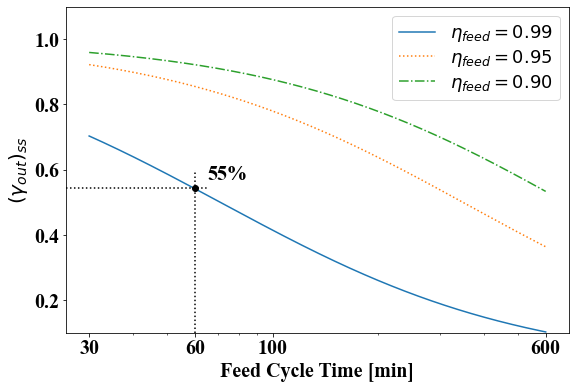

In [15]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(9,6))
ax.semilogx(TfSpace, Gout_st_99,       label='$\eta_{feed} = 0.99$')
ax.semilogx(TfSpace, Gout_st_95, ':',  label='$\eta_{feed} = 0.95$' )
ax.semilogx(TfSpace, Gout_st_90, '-.', label='$\eta_{feed} = 0.90$' )
ax.set_xscale('log')
ax.set_xticks([30, 60, 100, 600])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlabel('Feed Cycle Time [min]')
ax.set_ylabel('$(\gamma_{out})_{ss}$')
plt.ylim([0.1,1.1])

ax.axhline(y=0.545, xmax = 0.28, color='k', linestyle=':')
ax.axvline(x=60, ymax = 0.5, color='k', linestyle=':')
ax.plot(60, 0.545, 'o', color='k')
ax.text(65, 0.57, '55%', dict(size=15), color='k',size=20)
ax.legend(loc='upper right', frameon=True, labelspacing=0.2, prop={'size': 18})

In [16]:
############### Defining computational parameters ################
nLoops = 400 # number of swings

# remanent fractions of the VSA feed column
Evsa_99 = 0.99
Evsa_95 = 0.95 
Evsa_90 = 0.90 

# this script is only with a VSA and without a single trap 
# so Ect single trap remanent fraction is taken zero
Ect = 0 # single trap remanent fraction

r_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
r_purge = 0.1 # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)

Trn    = 132*60 # Rn lifetime in min (note this is lifetime not half life)
T_feed = 60     # one swing time in min

###################################################################

Gi_99 = 1 #  initial Rn fraction (1 b/c no reductin at first)
Gi_95 = 1 #  initial Rn fraction
Gi_90 = 1 #  initial Rn fraction

# pre-allocation sim needed variables
Gout_99 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_95 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed 

# simulation starts:
#looping over the feeds
for i in range(0,nLoops):
    # estimate fraction of radon escaped the swing system
    Gout_99[i] = RRS_Gout(r_leave,Evsa_99,Gi_99,T_feed,Trn)
    Gout_95[i] = RRS_Gout(r_leave,Evsa_95,Gi_95,T_feed,Trn)
    Gout_90[i] = RRS_Gout(r_leave,Evsa_90,Gi_90,T_feed,Trn)

   
    # Gin changes as we loop over the feed cycle time until we reach steady state
    Gi_99 = RRS_Gin(r_purge,Evsa_99, Ect, Gi_99,T_feed,Trn)
    Gi_95 = RRS_Gin(r_purge,Evsa_95, Ect, Gi_95,T_feed,Trn)
    Gi_90 = RRS_Gin(r_purge,Evsa_90, Ect, Gi_90,T_feed,Trn)

    

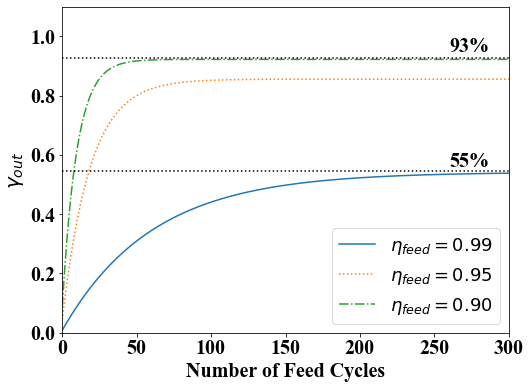

In [17]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(Gout_99,       label='$\eta_{feed} = 0.99$')
plt.plot(Gout_95, ':',  label='$\eta_{feed} = 0.95$')
plt.plot(Gout_90, '-.', label='$\eta_{feed} = 0.90$')

plt.axhline(y=0.546, color='k', linestyle=':')
plt.text(260, 0.56, '55%', dict(size=15), color='k', size=20)

plt.axhline(y=0.928, color='k', linestyle=':')
plt.text(260, 0.95, '93%', dict(size=15), color='k',size=20)

plt.xlabel('Number of Feed Cycles')
plt.ylabel('$\gamma_{out}$')
plt.xlim(0,300)
plt.ylim(0, 1.1)
plt.legend(frameon=True, prop={'size': 18})
plt.show()

In [16]:
############### Defining computational parameters ################
nLoops = 400 # number of swings


# remanent fractions of the feed column 
Evsa_99 = 0.99 
Evsa_95 = 0.95 
Evsa_90 = 0.90 



Ect = 0.1 # remanent fraction of single trap

r_leave = 0.9 # fraction of cleaned air (xenon) leaving the swing system
r_purge = 0.1 # fraction of cleaned air (xenon) for purging the other colume of the swing system (F_leave + F_purge = 1)

Trn    = 132*60 # Rn lifetime in min (note this is lifetime not half life)
T_feed = 60     # one swing time in min

###################################################################

Gi_99 = 1 #  initial Rn fraction (1 b/c no reductin at first)
Gi_95 = 1 #  initial Rn fraction
Gi_90 = 1 #  initial Rn fraction

# pre-allocation sim needed variables
Gout_99 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_95 = np.zeros(nLoops) # array of radon fraction escaped in each feed
Gout_90 = np.zeros(nLoops) # array of radon fraction escaped in each feed


# simulation starts:
# looping over the feeds
for i in range(0,nLoops):
    # estimate fraction of radon escaped the swing system
    Gout_99[i] = RRS_Gout(r_leave,Evsa_99,Gi_99,T_feed,Trn)
    Gout_95[i] = RRS_Gout(r_leave,Evsa_95,Gi_95,T_feed,Trn)
    Gout_90[i] = RRS_Gout(r_leave,Evsa_90,Gi_90,T_feed,Trn) 

   
    # Gin changes as we loop over the feed cycle time until we reach steady state
    Gi_99 = RRS_Gin(r_purge,Evsa_99, Ect, Gi_99,T_feed,Trn)
    Gi_95 = RRS_Gin(r_purge,Evsa_95, Ect, Gi_95,T_feed,Trn)
    Gi_90 = RRS_Gin(r_purge,Evsa_90, Ect, Gi_90,T_feed,Trn)

    

In [17]:
eta_52 = 1-Gout_90[-1]
print(eta_52)

0.5228110279255529


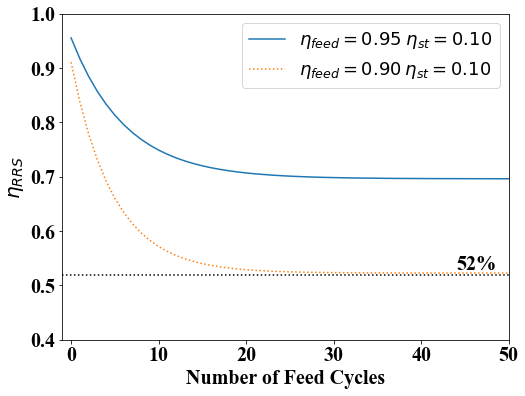

In [62]:
figure_layout(1)
plt.figure(figsize=(8,6))

plt.plot(1-Gout_95,  label='$\eta_{feed} = 0.95 \; \eta_{st} = 0.10$')
plt.plot(1-Gout_90, ':', label='$\eta_{feed} = 0.90 \: \eta_{st} = 0.10$')

plt.axhline(y=0.52, color='k', linestyle=':')
plt.text(44, 0.53, '52%', dict(size=15), color='k', size=20)

plt.xlabel('Number of Feed Cycles')
plt.ylabel('$\eta_{RRS}$')
plt.xlim(-1,50)
plt.ylim(0.4, 1)
plt.legend(frameon=True, prop={'size': 18})
plt.show()

In [21]:
############### Defining computational parameters ################

nLoops = 1000 # number of swings

Evsa_range = np.linspace(0.7,1,1001) # array remanent fractions of the feed column
Ect_range = np.linspace(0,1,1001)    # array remanent fractions of the single trap


r_leave = 0.9 
r_purge = 0.1 

Trn    = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed = 60     # one swing time in unit of minute

#################################################################

#Gi = 1 # initial Rn fraction (1 b/c no reductin at first)


# pre-allocation sim needed variables
Gout_matrix = np.zeros([len(Evsa_range) ,nLoops]) # matrix of radon fraction escaped in each swing
Gtot = np.zeros([len(Evsa_range),len(Ect_range)]) # matrix of total radon fraction escaped

# simulation starts:
for idx2, e2 in enumerate(Ect_range):
    Gi = 1 # initial Rn fraction (1 b/c no reductin at first)
    for i in range(0,nLoops):
        # radon fraction escaped the swing system
        #Gout_matrix[:,i] = r_leave*(1-Evsa_range)*Gi*np.exp(-T_feed/Trn)
        Gout_matrix[:,i] = RRS_Gout(r_leave,Evsa_range,Gi,T_feed,Trn)

        # Gi changes as we loop over the feed cycle time until we reach steady state      
        # Gi = 1 + (1-e2)*( r_purge*(1-Evsa_range)*Gi + (Evsa_range*Gi) )*np.exp(-T_feed/Trn)
        Gi = RRS_Gin(r_purge,Evsa_range, e2, Gi,T_feed,Trn)
    # save the escaped radon fraction at asymptotic value to Ntot
    Gtot[:,idx2] = Gout_matrix[:,-1]


In [22]:
eta_RRS_map = 1-Gtot

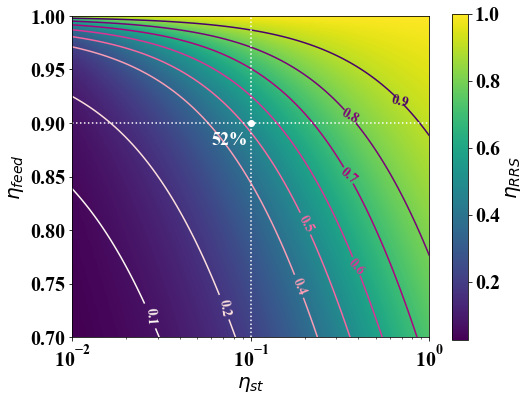

In [23]:
# do plot
figure_layout(1)
plt.figure(figsize=(8,6))

manual_locations = [(0.7, 0.95), (0.35, 0.9), (0.35, 0.85), (0.4, 0.77), (0.22, 0.81), (0.2, 0.75),(0.1, 0.73),(0.03, 0.72)]
cp = plt.contour(Ect_range, Evsa_range, eta_RRS_map, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0,fmt='%.01f')


plt.imshow(eta_RRS_map, origin='lower', alpha=1, extent = [0.01, 1, 0.7, 1], aspect = 6)
cbar = plt.colorbar();

plt.axhline(y=0.9, color='white', linestyle=':')
plt.axvline(x=0.1, color='white', linestyle=':')
plt.plot(0.1, 0.9, 'o', color='white')
plt.text(0.06, 0.88, '52%', dict(size=15), color='white', size=18)




cbar.set_label('$\eta_{RRS}$', rotation=90)
plt.xlabel('$\eta_{st}$')
plt.ylabel('$\eta_{feed}$')
plt.xscale('log')
plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

In [24]:
############### Defining computational parameters ################
RoXeAtSTP     = 5.86     # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500      # SLPM nominal LZ volumetric flow rate
Trn           = 132*60   # Rn lifetime in unit of minute (note this is lifetime not half life)
##################################################################

#turnaround time in LZ in min
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)

def radonReductionInDet_noS(TurnaroundTime, radonLifeTime, eff): 
    return radonLifeTime/(TurnaroundTime/eff+radonLifeTime)

#Rn reduction in 10,000 kg xenon of LZ with 500SLPM flow, with a  RRS with rem frac map given by eta_RRS_map 
lz_Rn_red_eta_noS = radonReductionInDet_noS(Tlz, Trn, eta_RRS_map)

In [25]:
radonReductionInDet_noS(Tlz, Trn, 0.52)

0.5468328327950917

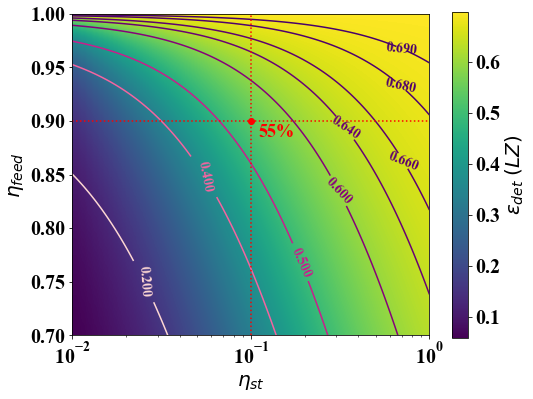

In [26]:
# do plot
figure_layout(1)
plt.figure(figsize=(8,6))


manual_locations = [(0.7, 0.97), (0.7, 0.95),(0.7, 0.85), (0.35, 0.9), (0.35, 0.85), (0.2, 0.77),(0.02, 0.75),(0.08, 0.85)]
cp = plt.contour(Ect_range, Evsa_range, lz_Rn_red_eta_noS, levels=[0.1, 0.2, 0.4, 0.5, 0.6, 0.64, 0.66, 0.68, 0.69], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0)


plt.imshow(lz_Rn_red_eta_noS, origin='lower', alpha=1,extent = [0.01, 1, 0.7, 1], aspect = 6)
cbar = plt.colorbar();

plt.axhline(y=0.9, color='r', linestyle=':')
plt.axvline(x=0.1, color='r', linestyle=':')
plt.plot(0.1, 0.9, 'ro')
plt.text(0.11, 0.885, '55%', dict(size=15), color='r', size=18)

plt.xlabel('$\eta_{st}$')
plt.ylabel('$\eta_{feed}$')

cbar.set_label('$\epsilon_{det} \; (LZ)$', rotation=90)

plt.xscale('log')


plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

### Performance of a  VSA  taking into accout the charcoal activity

mass of a trap for a given breakthrough time and flow rate can be calculated from $t_b = \frac{mk_a}{f}$

In [4]:
# returns the mass of the charcoal trap to achivie a given breakthrough time for at given flow rate

T_feed = 60   # min (chosen to be so based on this calculation, can be made longer)
F_LZ   = 500  # LZ flow rate 500 SLPM

Ka_ct     = 3000 #l/kg at 190K
Ka_wt     = 500  #l/kg at 295K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate 

#print(feedFlowFraction*F_LZ*1.5*T_feed/Ka_ct/1000)

def massCharForBreaktrhoughTime(breakthroughTime, trapFlowRate, Ka):
    return breakthroughTime*trapFlowRate / Ka
        
massCharVSA_C = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_ct) #  kilogram
massCharVSA_W = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_wt) #  kilogram 

print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in 190K temperature trap' %(massCharVSA_C, 1.5*T_feed, T_feed))
print('%.2f kg charcoal is needed to achieve breakthrough(feed) time of %.2f(%.2f) min in room temperature trap' %(massCharVSA_W, 1.5*T_feed, T_feed))

16.67 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in 190K temperature trap
100.00 kg charcoal is needed to achieve breakthrough(feed) time of 90.00(60.00) min in room temperature trap




The trap contribution in a single feed cycle is obtained from: <br>
$(N_{trap})_{feed} \approx \frac{s_om}{2(t_b)_{feed}}T_{feed}^2$ <br>

$(N_{trap})_{purge} \approx 2s_omT_{feed}- \frac{s_om}{2(t_b)_{purge}}T_{feed}^2$ <br>



In [5]:
############### Defining computational parameters and constants ###################
Trn       = 132*60       #min  Rn lifetime in min (note this is lifetime not half life)
T_feed    = 60           #min
Tf_bt     = 1.5*T_feed   #min  90minutes

S_o       = 0.5    # radon activity of charcoal in milliBq/kg

Ka_ct     = 3000   #l/kg at 190K
Ka_wt     = 500    #l/kg at 295K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate

flowLZ = 500 #slpm

#print(flowLZ*feedFlowFraction)
#print(flowLZ*purgeFlowFraction)

massCharVSA_C = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_ct) #  kilogram
massCharVSA_W = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_wt) #  kilogram

#####################################################################################

# mass is in kg, charcoal activity is in mbq/kg; feedtime is in minutes, main flow is in slpm, ka is in l/kg

def FeedColumnRnCountperFeedTime(So, feedTime, tfbreak, mass):
     return (1/2)*(mass)*(So*1e-3*60)*(feedTime*feedTime)*(1/tfbreak)

# def PurgeColumnRnCountperFeedTime(So, feedTime, mainFlow, adsK, flowFrac, mass):
#     return 2*(So*1e-3*60)*feedTime*mass - FeedColumnRnCountperFeedTime(So, feedTime, mainFlow, adsK, flowFrac)

def PurgeColumnRnCountperFeedTime(So, feedTime, tfbreak, mass):
    FCRPFT = ( (So*1e-3*60)*feedTime*mass - FeedColumnRnCountperFeedTime(So,feedTime,tfbreak,mass) )*np.exp(-feedTime/Trn)
    PCRPFT = (So*1e-3*60)*feedTime*mass + FCRPFT
    return PCRPFT

#TRF_feed  = FeedColumnRnCountperFeedTime(S_o, T_feed, flowLZ, Ka_ct, feedFlowFraction)
TRF_feed  = FeedColumnRnCountperFeedTime(S_o, T_feed,Tf_bt,massCharVSA_C)
print("Number of Rn atoms leave the feed column in Tfeed time %.4f " %(TRF_feed)) 
#TRF_purge = PurgeColumnRnCountperFeedTime(S_o, T_feed, flowLZ, Ka_ct, feedFlowFraction, massChar70_C)
TRF_purge = PurgeColumnRnCountperFeedTime(S_o, T_feed,Tf_bt,massCharVSA_C)
print("Number of Rn atoms leave the purge column in Tfeed time %.4f " %(TRF_purge))

Number of Rn atoms leave the feed column in Tfeed time 10.0000 
Number of Rn atoms leave the purge column in Tfeed time 49.8491 


In [6]:
eta_ST = 0.10

Trn       = 132*60       # min  Rn lifetime in min (note this is lifetime not half life)
Ka_ct     = 3000         # l/kg at 190K

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate
    
    
flowLZ    = 500 #slpm

# for a given single-trap remanent fraction returns the mass of charcoal in kg necessary
def massST_for_etaST(etaST):
    massST = -1*np.log(1- etaST)*((flowLZ*purgeFlowFraction)*Trn)/Ka_ct
    return massST
print("%.4f kg charcoal needed for  %.2f remanent fraction" %(massST_for_etaST(eta_ST),eta_ST))

15.4529 kg charcoal needed for  0.10 remanent fraction


radon output from a single trap in one feed
$(N_{st})_{feed} = A_{st}T_{feed}=\frac{s_of\tau}{k_a}\left(1-e^{-\frac{mk_a}{f\tau }}\right)T_{feed}$

In [7]:
#this funtion calculates the radon counts of a single-trap in a Tfeed time

r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate
    
    
flowLZ    = 500     #slpm
Ka_ct     = 3000    # l/kg at 190K
Trn       = 132*60  #min  Rn lifetime in min (note this is lifetime not half life)

# mass is in kg, charcoal activity is in mbq/kg; feedtime is in minutes
def E_CT_Swing_rn_count(mass, Srn, Tf, ka, flow, Tau):
    return (Tau*(Srn*1e-3*60)*flow/ka)*(1 - np.exp(-ka*mass/(flow*Tau)))*(Tf)

T_feed = 60  # min
massST10 = massST_for_etaST(0.10)  #kg
S_o    = 0.5 # radon activity of charcoal in mili/kg

#print(flowLZ*purgeFlowFraction)
stRnCountPerFeed = E_CT_Swing_rn_count(massST10, S_o, T_feed, Ka_ct,purgeFlowFraction*flowLZ,Trn)
print("Single-trap Rn count per feed time is %.3f " %(stRnCountPerFeed))

Single-trap Rn count per feed time is 26.400 


evolution of radon atoms in the RRS given by the ss solution of these equations only the source is the RRS 
$(N_{out})_{n} = (N_{in})_{n}(1-\eta_{feed}){e^{-t_{feed}/\tau}}r_{out} + N_{feed}r_{out}$
$(N_{in})_{n+1} = N_{st} + (1-\eta_{st})\Big[(N_{in})_n(1-\eta_{feed}){e^{-t_{feed}/\tau}}r_{purge} + (N_{in})_{n}\eta_{feed}e^{-t_{feed}/\tau }+N_{feed}r_{purge} + N_{purge}\Big]$

In [8]:
def SRRS_Nout_PerFeed(rOUT,EtaVSA,gammaIN,feedTIME,lifeRN,Nfeed):
    return rOUT*( (1-EtaVSA)*gammaIN*np.exp(-feedTIME/lifeRN) + Nfeed)
def SRRS_Nin_PerFeed(rPURGE,EtaVSA,EtaST,gammaIN,feedTIME,lifeRN,STfeed,Nfeed,Pfeed):
    return STfeed + (1-EtaST)*( rPURGE*(1-EtaVSA)*gammaIN*np.exp(-feedTIME/lifeRN) +rPURGE*Nfeed + EtaVSA*gammaIN*np.exp(-feedTIME/lifeRN) + Pfeed)
                                                            

In [9]:
# Performance of the RRS including the specific activity of charcoal

############### Defining computational parameters and constants ######################

nLoops = 1000 # number of swings

Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     # min

Ka_ct     = 3000   # l/kg at 190K
Ka_wt     = 500    # l/kg at 295K
 
r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate

Evsa = 0.90 # VSA (feed column) remanent fraction 
Ect = 0.10  # remanent fraction of the single trap


flowLZ = 500 #slpm

mass_vsa_warm = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_wt) #  kilogram
mass_vsa_cold = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_ct) #  kilogram
#print(mass_vsa_cold)
#print(mass_vsa_warm)

massST = massST_for_etaST(Ect) #kg


SoSpace = np.linspace(0, 0.8, 1001) #in units of mBq/kg
###########################################################################################

Gout_st_1  = np.zeros(len(SoSpace))
Gout_st_2  = np.zeros(len(SoSpace))

# simulation starts:
for idx, s in enumerate(SoSpace):
    Gi_1 = 0 # initial Rn count (0 b/c nothing comes in at first)
    Gi_2 = 0 # initial Rn count (0 b/c nothing comes in at first)

    # pre-allocation sim needed variables
    Gout_1  = np.zeros(nLoops) # array of radon counts escaped in each swing
    Gout_2  = np.zeros(nLoops) # array of radon counts escaped in each swing
    
    #radon atoms from the feed column in one feed time 
    TRF_feed_warm  = FeedColumnRnCountperFeedTime(s, T_feed, 1.5*T_feed, mass_vsa_warm)
    TRF_feed_cold  = FeedColumnRnCountperFeedTime(s, T_feed, 1.5*T_feed, mass_vsa_cold)


    #radon atoms from the purge column in one feed time 
    TRF_purge_warm = PurgeColumnRnCountperFeedTime(s, T_feed, 1.5*T_feed, mass_vsa_warm)
    TRF_purge_cold = PurgeColumnRnCountperFeedTime(s, T_feed, 1.5*T_feed, mass_vsa_cold)
    #print(TRF_purge_warm)
    #print(TRF_purge_cold)
    
    ST_RN_PerFeed = E_CT_Swing_rn_count(massST, s, T_feed, Ka_ct, purgeFlowFraction*flowLZ,Trn)
    
    for i in range(0,nLoops):
        
        #radon escaped from rrs
        Gout_1[i] = SRRS_Nout_PerFeed(r_leave,Evsa,Gi_1,T_feed,Trn,TRF_feed_warm)
        Gout_2[i] = SRRS_Nout_PerFeed(r_leave,Evsa,Gi_2,T_feed,Trn,TRF_feed_cold)
        #Gout_1[i] = r_leave*((1-Evsa)*Gi_1*np.exp(-T_feed/Trn) + TRF_feed_warm)
        #Gout_2[i] = r_leave*((1-Evsa)*Gi_2*np.exp(-T_feed/Trn) + TRF_feed_cold)
        

        # Gin changes as we loop over the feed cycle time until we reach steady state
        Gi_1 = SRRS_Nin_PerFeed(r_purge,Evsa,Ect,Gi_1,T_feed,Trn,ST_RN_PerFeed,TRF_feed_warm,TRF_purge_warm)
#         Gi_1 =  ST_RN_PerFeed + (1-Ect)*(r_purge*( (1-Evsa)*Gi_1*np.exp(-T_feed/Trn) + TRF_feed_warm )
#                                          + (Evsa*Gi_1)*np.exp(-T_feed/Trn) 
#                                          + TRF_purge_warm)
                   
        Gi_2 = SRRS_Nin_PerFeed(r_purge,Evsa,Ect,Gi_2,T_feed,Trn,ST_RN_PerFeed,TRF_feed_cold,TRF_purge_cold)
#         Gi_2 =  ST_RN_PerFeed + (1-Ect)*(r_purge*( (1-Evsa)*Gi_2*np.exp(-T_feed/Trn) + TRF_feed_cold )
#                                          + (Evsa*Gi_2)*np.exp(-T_feed/Trn) 
#                                          + TRF_purge_cold) 
        
    Gout_st_1[idx] = Gout_1[-1]
    Gout_st_2[idx] = Gout_2[-1]

In [10]:
for i, s in enumerate(SoSpace):
    if SoSpace[i] == 0.5:
        srrs_c_05 = Gout_st_2[i]*1e+3/(T_feed*60)
print("Total Rn contribution from a RRS with 0.9 vsa and 0.1 single trap  with 0.5mBq/kg saratech is %.3fmBq" %(srrs_c_05))

Total Rn contribution from a RRS with 0.9 vsa and 0.1 single trap  with 0.5mBq/kg saratech is 12.066mBq


In [11]:
srrs_w_90 = Gout_st_1*1e+3/(T_feed*60) # turning counts to mBq
srrs_c_90 = Gout_st_2*1e+3/(T_feed*60) # turning counts to mBq

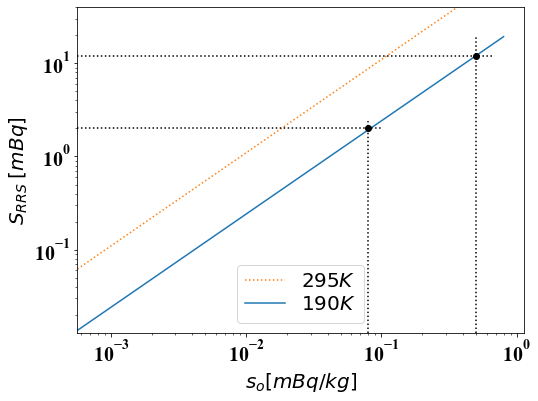

In [12]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(SoSpace, srrs_w_90, ':', color='tab:orange',  label='$295 K $')
ax.plot(SoSpace, srrs_c_90,      color='tab:blue',    label='$190 K $')



ax.axhline(y=2, color='k', xmax=0.68, linestyle=':')
ax.axvline(x=0.08, color='k', ymax=0.65,  linestyle=':')
plt.plot(0.08, 2, color='k', marker='o')

ax.axhline(y=12.1, color='k', xmax=0.93, linestyle=':')
ax.axvline(x=0.5, color='k', ymax=0.91,  linestyle=':')
plt.plot(0.5, 12.1, color='k', marker='o')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$s_o [mBq/kg]$')
ax.set_ylabel('$S_{RRS} \; [mBq]$')

plt.ylim(-0.2, 40)
ax.legend(loc='middle left', frameon=True, labelspacing=0.2)

plt.show()

In [18]:
############### Defining computational parameters ################
RoXeAtSTP     = 5.86     # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500      # SLPM nominal LZ volumetric flow rate
Trn           = 132*60   # Rn lifetime in unit of minute (note this is lifetime not half life)
##################################################################

def radonReductionInDet_wS(TurnaroundTime, radonLifeTime, eff, sr):
    Sdet=20 #mBq
    return (eff*radonLifeTime - TurnaroundTime*(sr/Sdet))/(eff*radonLifeTime + TurnaroundTime)

#turnaround time in LZ in min
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)
#print(Tlz/(60*24))

lz_Rn_red_so_c = radonReductionInDet_wS(Tlz, Trn, eta_52, srrs_c_90)
lz_Rn_red_so_w = radonReductionInDet_wS(Tlz, Trn, eta_52, srrs_w_90)
print(radonReductionInDet_wS(Tlz, Trn, eta_52, srrs_c_05))

0.27558896376033054


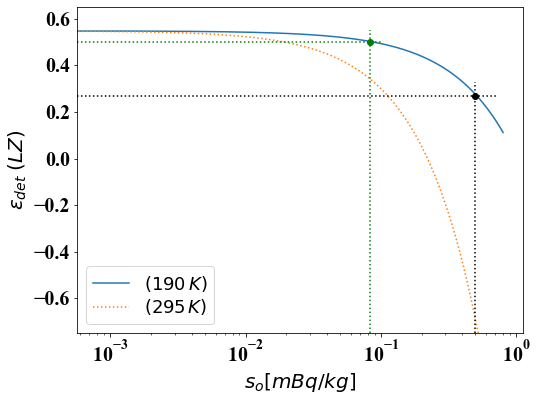

In [22]:
figure_layout(1)
fig, ax = plt.subplots(figsize=(8,6))
ax.semilogx(SoSpace, lz_Rn_red_so_c,      color='tab:blue',    label='$(190\,K)$')
ax.semilogx(SoSpace, lz_Rn_red_so_w, ':', color='tab:orange',  label='$(295\,K)$')
ax.axvline(x=0.5, color='k', ymax=0.77,  linestyle=':')
ax.axvline(x=0.5/6, color='green', ymax=0.93,  linestyle=':')
ax.axhline(y=0.27, color='k', xmax=0.94, linestyle=':')
ax.axhline(y=0.5, color='green', xmax=0.68, linestyle=':')
plt.plot(0.5  ,0.27, color='k', marker='o')
plt.plot(0.5/6, 0.5, color='green', marker='o')

ax.set_xlabel('$s_o [mBq/kg]$')
ax.set_ylabel('$\epsilon_{det} \; (LZ)$')
plt.ylim(-0.75, 0.65)

ax.legend(loc='best', frameon=True, labelspacing=0.2, prop={'size': 18})

In [50]:
############### Defining computational parameters ################

nLoops = 1000 # number of swings


Evsa_range = np.linspace(0.7,1,1001) # remanent fraction of the feed column, percentage of radon trapped by VSA
Ect_range = np.linspace(0,1,1001) # remanent fraction of the cold trap, percentage of radon trapped by cold trap



r_leave = 0.9 
r_purge = 0.1 

Trn = 132*60 # # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed = 60 # # one swing time in unit of minute

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate

Ka_ct     = 3000   # l/kg at 190K
Ka_wt     = 500    # l/kg at 295K

flowLZ = 500 #slpm

ch_activity = 0.5 # mBq/kg

mass_vsa_cold = massCharForBreaktrhoughTime(1.5*T_feed, feedFlowFraction*F_LZ, Ka_ct) #  kilogram
#print(mass_vsa_cold)
#print(mass_vsa_warm)

#################################################################

#Gi = 0 # initial Rn count (0 b/c initially nothing)


# pre-allocation sim needed variables
Gout_matrix = np.zeros([len(Evsa_range) ,nLoops]) # matrix of radon atoms escaped in each swing
Gtot = np.zeros([len(Evsa_range),len(Ect_range)]) # matrix of total radon fraction escaped

#radon atoms from the feed column in one feed time 
TRF_feed_cold  = FeedColumnRnCountperFeedTime(ch_activity, T_feed, 1.5*T_feed, mass_vsa_cold)
#radon atoms from the purge column in one feed time 
TRF_purge_cold = PurgeColumnRnCountperFeedTime(ch_activity, T_feed, 1.5*T_feed, mass_vsa_cold)


#print(TRF_feed_cold, TRF_purge_cold)

# simulation starts:
for idx2, e2 in enumerate(Ect_range):
    Gi = 0 # initial Rn count (0 b/c initially nothing)
    massST = massST_for_etaST(e2)
    # rn contribution in a feed time from e2 rem frac single trap
    ST_RN_PerFeed = E_CT_Swing_rn_count(massST, ch_activity, T_feed, Ka_ct, purgeFlowFraction*flowLZ,Trn)
    #print(e2, massST, E_CT_Swing_rn_act(massST, ch_activity))
    
    for i in range(0,nLoops):
        # radon count escaping the swing system
        #Gout_matrix[:,i] = r_leave*((1-Evsa_range)*Gi*np.exp(-T_feed/Trn) + TRF_feed_cold)
        Gout_matrix[:,i] = SRRS_Nout_PerFeed(r_leave,Evsa_range,Gi,T_feed,Trn,TRF_feed_cold)

        # Gi changes as we loop over the feed cycle time until we reach steady state
        Gi = SRRS_Nin_PerFeed(r_purge,Evsa_range,e2,Gi,T_feed,Trn,ST_RN_PerFeed,TRF_feed_cold,TRF_purge_cold)
#         Gi = ST_RN_PerFeed + (1-e2)*( r_purge*( (1-Evsa_range)*Gi*np.exp(-T_feed/Trn) + TRF_feed_cold ) 
#                                       + (Evsa_range*Gi)*np.exp(-T_feed/Trn)
#                                       + TRF_purge_cold )  

        
    # save the escaped radon counts per feed at asymptotic value to Ntot
    Gtot[:,idx2] = Gout_matrix[:,-1]






In [51]:
SrrsMAP = Gtot*1e+3/(T_feed*60)

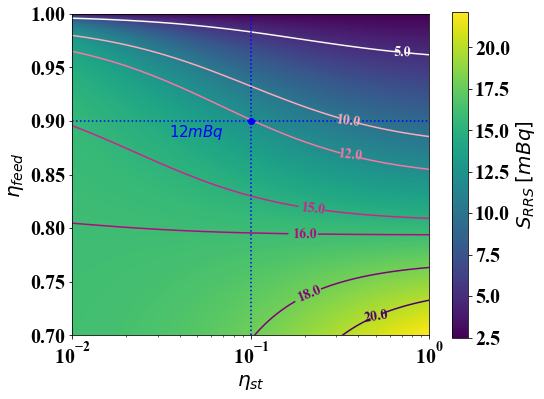

In [52]:
# do plot
figure_layout(1)
plt.figure(figsize=(8,6))


manual_locations = [(0.7, 0.95), (0.35, 0.9), (0.35, 0.85), (0.5, 0.73), (0.22, 0.81), (0.2, 0.75),(0.2, 0.80)]
cp = plt.contour(Ect_range, Evsa_range, SrrsMAP, levels=[5, 10, 12, 15, 16, 18, 20], cmap='RdPu')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0,fmt='%.01f')


plt.imshow(SrrsMAP, origin='lower', alpha=1, extent = [0.01, 1, 0.7, 1], aspect = 6)

cbar = plt.colorbar()

plt.axhline(y=0.9, color='blue', linestyle=':')
plt.axvline(x=0.1, color='blue', linestyle=':')
plt.plot(0.1, 0.9, 'o', color='blue')
plt.text(0.035, 0.885, '$12mBq$', dict(size=15), color='blue', size=15)


cbar.set_label('$S_{RRS} \; [mBq]$', rotation=90)
plt.xlabel('$\eta_{st}$')
plt.ylabel('$\eta_{feed}$')
plt.xscale('log')
plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

In [55]:
############### Defining computational parameters ################
RoXeAtSTP     = 5.86 # desity of xenon at STP in g/l
totalXeMassLZ = 10000000 # g which is 10 metric tonnes
FlowRateLZ    = 500 # SLPM nominal LZ volumetric flow rate
Trn = 132*60 # # Rn lifetime in unit of min (note this is lifetime not half life)
##################################################################

#turnaround time in LZ in min
Tlz = totalXeMassLZ/(FlowRateLZ*RoXeAtSTP)
#print(Tlz/(24*60))

#Rn reduction in 10,000 kg senonLZ with a realistic RRS 
# with remanent raction given by eta_RRS_map and rn contribution SrrsMAP 
lz_Rn_red_smap = radonReductionInDet_wS(Tlz, Trn, eta_RRS_map, SrrsMAP)



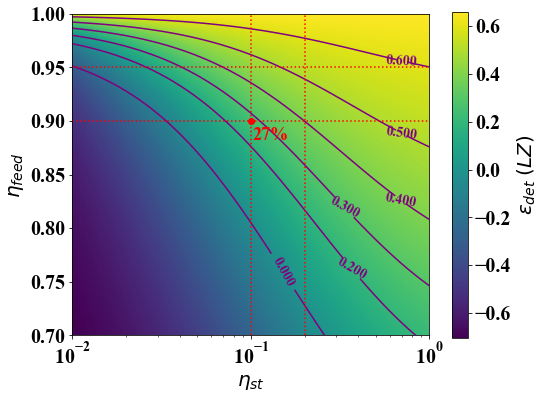

In [56]:
figure_layout(1)
plt.figure(figsize=(8,6))

manual_locations = [(0.7, 0.90), (0.7, 0.95),(0.7, 0.85), (0.35, 0.83), (0.35, 0.75), (0.2, 0.77)]

cp = plt.contour(Ect_range, Evsa_range, lz_Rn_red_smap, levels=[0, 0.20, 0.3, 0.4, 0.5, 0.6], colors='purple')
plt.clabel(cp, inline=True, fontsize=14, manual=manual_locations, inline_spacing=0)




plt.imshow(lz_Rn_red_smap, origin='lower', alpha=1, extent = [0.01, 1, 0.7, 1], aspect = 6)

cbar = plt.colorbar()

plt.axhline(y=0.9, color='r', linestyle=':')
plt.axvline(x=0.1, color='r', linestyle=':')
plt.plot(0.1, 0.9, 'ro')
plt.text(0.102, 0.883, '27%', dict(size=15), color='r', size=18)

plt.axhline(y=0.95, color='r', linestyle=':')
plt.axvline(x=0.20, color='r', linestyle=':')


plt.xlabel('$\eta_{st}$')
plt.ylabel('$\eta_{feed}$')

cbar.set_label('$\epsilon_{det} \; (LZ)$', rotation=90)

plt.xscale('log')

plt.ylim([0.7,1])
plt.xlim([0.01,1])
plt.show()

### exploring the dependence on feed cycle time

In [53]:
# Performance of the RRS including the specific activity of charcoal

############### Defining computational parameters and constants ######################

nLoops = 1000 # number of swings

Trn       = 132*60 # Rn lifetime in unit of minute (note this is lifetime not half life)
T_feed    = 60     # min

Ka_ct     = 3000   # l/kg at 190K
Ka_wt     = 500    # l/kg at 295K
 
r_leave = 0.9 # fraction of cleaned carrier gas leaving the swing system
r_purge = 0.1 # fraction of cleaned carrier gas for purging 

feedFlowFraction  = 1/r_leave       # fraction of flow in the feed column of the vsa to detector flow rate
purgeFlowFraction = r_purge/r_leave # fraction of flow in the purge column of the vsa to detector flow rate

Evsa = 0.90  # VSA (feed column) remanent fraction
Ect  = 0.10  # remanent fraction of the single trap


flowLZ = 500 #slpm

massST = massST_for_etaST(Ect) #kg


S_o = 0.5 #mBq/kg

TfSpace = np.linspace(10,200,1000) # range of feed times
###########################################################################################

Gout_st_w  = np.zeros(len(TfSpace))
Gout_st_c  = np.zeros(len(TfSpace))



# simulation starts:
for idx, t in enumerate(TfSpace):
    
    Gi_1 = 0 # initial Rn count (1 b/c no reductin at first)
    Gi_2 = 0 # initial Rn count (1 b/c no reductin at first)
    
    # pre-allocation sim needed variables
    Gout_1  = np.zeros(nLoops) # array of radon fraction escaped in each swing
    Gout_2  = np.zeros(nLoops) # array of radon fraction escaped in each swing
    
    mass_vsa_warm = massCharForBreaktrhoughTime(1.5*t, feedFlowFraction*F_LZ, Ka_wt) #  kilogram
    mass_vsa_cold = massCharForBreaktrhoughTime(1.5*t, feedFlowFraction*F_LZ, Ka_ct) #  kilogram
    
    #radon atoms from the feed column in one feed time 
    TRF_feed_warm  = FeedColumnRnCountperFeedTime(S_o, t, 1.5*t, mass_vsa_warm)
    TRF_feed_cold  = FeedColumnRnCountperFeedTime(S_o, t, 1.5*t, mass_vsa_cold)


    #radon atoms from the purge column in one feed time     
    TRF_purge_warm = PurgeColumnRnCountperFeedTime(S_o, t, 1.5*t, mass_vsa_warm)
    TRF_purge_cold = PurgeColumnRnCountperFeedTime(S_o, t, 1.5*t, mass_vsa_cold)
    
    ST_RN_PerFeed = E_CT_Swing_rn_count(massST, S_o, t, Ka_ct, purgeFlowFraction*flowLZ,Trn)


    for i in range(0,nLoops):
        
        # radon per feed escaping  from rrs
        Gout_1[i] = SRRS_Nout_PerFeed(r_leave,Evsa,Gi_1,T_feed,Trn,TRF_feed_warm)
        Gout_2[i] = SRRS_Nout_PerFeed(r_leave,Evsa,Gi_2,T_feed,Trn,TRF_feed_cold)
        

        # Gin changes as we loop over the feed cycle time until we reach steady state
        Gi_1 = SRRS_Nin_PerFeed(r_purge,Evsa,Ect,Gi_1,T_feed,Trn,ST_RN_PerFeed,TRF_feed_warm,TRF_purge_warm)        
        Gi_2 = SRRS_Nin_PerFeed(r_purge,Evsa,Ect,Gi_2,T_feed,Trn,ST_RN_PerFeed,TRF_feed_cold,TRF_purge_cold)
      
    Gout_st_w[idx] = Gout_1[-1]*1e+3/(t*60) #converting to mBq
    Gout_st_c[idx] = Gout_2[-1]*1e+3/(t*60) #converting to mBq

In [54]:
srrs_tf_c=Gout_st_c 
srrs_tf_w=Gout_st_w 

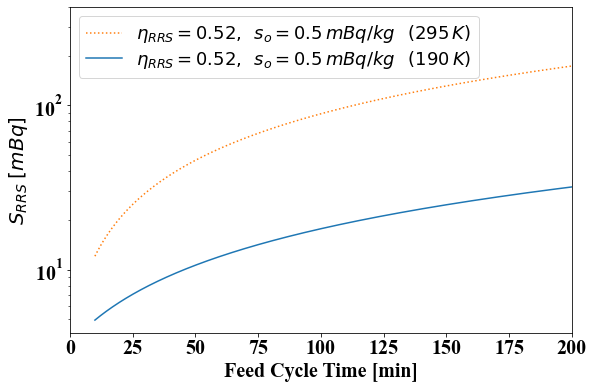

In [57]:
figure_layout(1)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(TfSpace, srrs_tf_w,':', color='tab:orange', label='$\eta_{RRS}=0.52,$ ' ' $s_o = 0.5\,mBq/kg$ ' '  $(295\,K)$')
ax.plot(TfSpace, srrs_tf_c,     color='tab:blue',   label='$\eta_{RRS}=0.52,$ ' ' $s_o = 0.5\,mBq/kg$ ' '  $(190\,K)$')


#ax.set_xscale('log')
ax.set_yscale('log')

#plt.axhline(y=12, color='k', linestyle=':')
#plt.axvline(x=60, color='k', linestyle=':')

ax.set_xlabel('Feed Cycle Time [min]')
ax.set_ylabel('$S_{RRS} \; [mBq]$')
plt.ylim([0,400])
plt.xlim([0,200])

ax.legend(loc='best', frameon=True, labelspacing=0.2, prop={'size': 18})